In [13]:
from  skimage.io import imread, imshow
import random
import os
import pywt
import re
import pywt.data
from skimage.transform import resize  # Correct import statement
import matplotlib.pyplot as plt
import numpy as np
# Import train_test_split function
from sklearn.model_selection import train_test_split

from sklearn import svm

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

from sklearn.model_selection import cross_val_score

In [22]:
def Get_Feacture(picture, cortes, target_size=(64, 768)):
    # Resize the image to a common size (e.g., 64x64)
    picture = resize_image(picture, target_size)
    
    LL = picture
    for i in range(cortes):
        LL, (LH, HL, HH) = pywt.dwt2(LL, 'haar')
    return LL.flatten()

# Function to resize an image using skimage
def resize_image(image, target_size):
    return resize(image, target_size, mode='constant', anti_aliasing=True)


numeros_de_especie = []
numeros_de_imagen = []

def process_images(path):
    files_names = os.listdir(path)
    vector_X = []
    vector_y = []    

    for filename in files_names:
        match = re.match(r'(\d{3})(\d{4})', filename)
        if match:
            esp  = match.group(1)
            num = match.group(2)
            especie = int(esp)
            imagen = int(num)
            image = imread(os.path.join(path, filename))
            feature = Get_Feacture(image, 2)
            vector_X.append(feature)
            vector_y.append(especie)
            
            numeros_de_especie.append(especie)
            numeros_de_imagen.append(imagen)
    return np.array(vector_X), np.array(vector_y)



path = './images'
vector_X,vector_y = process_images(path)

print("Números de especie:", numeros_de_especie)
print("Números de imagen:", numeros_de_imagen)

print(len(vector_y))
print(len(vector_X))

random.shuffle(vector_X)


Números de especie: [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 5

C:\Users\Sael\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Precisión de Regresión Logística: 0.152
Precisión de SVM: 0.152
Precisión de KNN: 0.144
Precisión de Árboles de decisión: 0.168


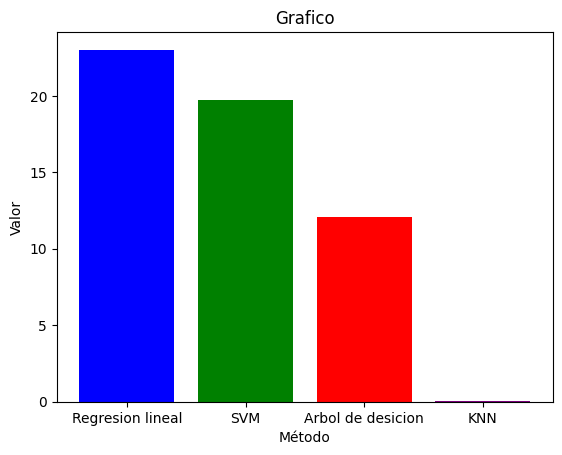

In [39]:
################################################
import matplotlib.pyplot as plt
import time
from sklearn.model_selection import train_test_split

tiemp= {}
# Aleatorización inicial de los datos originales
random.seed(42)  # Establece una semilla para la aleatorización (ajusta según sea necesario)
shuffled_indices = list(range(len(vector_X)))
random.shuffle(shuffled_indices)

# Aplicar la aleatorización a vector_X y vector_y
vector_X = vector_X[shuffled_indices]
vector_y = vector_y[shuffled_indices]

# División de datos en entrenamiento, validación y prueba
X_train, X_rest, y_train, y_rest = train_test_split(vector_X, vector_y, test_size=0.3, random_state=42)
X_valid, X_test, y_valid, y_test = train_test_split(X_rest, y_rest, test_size=0.5, random_state=42)

# Entrenar y evaluar Regresión Logística
inicio = time.time()
lr = LogisticRegression(max_iter = 1000)
lr.fit(X_train, y_train)
lr_pred = lr.predict(X_test)
lr_accuracy = accuracy_score(y_test, lr_pred)
final = time.time()
tiemp["Regresion lineal"] = final-inicio
# Entrenar y evaluar SVM
inicio = time.time()
svm = SVC()
svm.fit(X_train, y_train)
svm_pred = svm.predict(X_test)
svm_accuracy = accuracy_score(y_test, svm_pred)
final = time.time()
tiemp["SVM"] = final-inicio
# Entrenar y evaluar KNN
inicio = time.time()
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
knn_pred = knn.predict(X_test)
knn_accuracy = accuracy_score(y_test, knn_pred)
final = time.time()
tiemp["KNN"] = final-inicio

# Entrenar y evaluar Árboles de decisión
inicio = time.time()
tree = DecisionTreeClassifier()
tree.fit(X_train, y_train)
tree_pred = tree.predict(X_test)
tree_accuracy = accuracy_score(y_test, tree_pred)
final = time.time()
tiemp["Arbol de desicion"] = final-inicio

# Imprimir las precisiones de los modelos
print("Precisión de Regresión Logística:", lr_accuracy)
print("Precisión de SVM:", svm_accuracy)
print("Precisión de KNN:", knn_accuracy)
print("Precisión de Árboles de decisión:", tree_accuracy)

# Ordenar el diccionario por valores en orden decreciente
sorted_data = sorted(tiemp.items(), key=lambda x: x[1], reverse=True)

# Extraer las etiquetas y los valores ordenados
labels, values = zip(*sorted_data)
colors = ['blue', 'green', 'red', 'purple']

# Crear la gráfica de barras decreciente
plt.bar(labels, values, color=colors)

# Agregar etiquetas a los ejes
plt.xlabel('Método')
plt.ylabel('Valor')
plt.title('Grafico')

# Mostrar la gráfica
plt.show()

In [44]:

# Lista de modelos
models = [lr, svm, knn, tree]
data = {}

# Realizar K-fold cross-validation para cada modelo
num_folds = 5  # Puedes ajustar el número de pliegues K según tus necesidades

for model in models:
    # Aplicar K-fold cross-validation
    scores = cross_val_score(model, vector_X, vector_y, cv=num_folds, scoring='accuracy')
    data[model.__class__.__name__] = scores.mean()
        
    
    
    # Imprimir los resultados de la validación cruzada para cada modelo
    print("Modelo:", model.__class__.__name__)
    print("Precisión media:", scores.mean())
    print("Desviación estándar de la precisión:", scores.std())
    print("--------------------------------------------------")
    




C:\Users\Sael\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Sael\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable

Modelo: LogisticRegression
Precisión media: 0.20315273068321194
Desviación estándar de la precisión: 0.021489513342041654
--------------------------------------------------


KeyboardInterrupt: 

In [ ]:
# Ordenar el diccionario por valores en orden decreciente
sorted_data = sorted(tiemp.items(), key=lambda x: x[1], reverse=True)

# Extraer las etiquetas y los valores ordenados
labels, values = zip(*sorted_data)
colors = ['blue', 'green', 'red', 'purple']

# Crear la gráfica de barras decreciente
plt.bar(labels, values, color=colors)

# Agregar etiquetas a los ejes
plt.xlabel('Método')
plt.ylabel('Valor')
plt.title('Grafico')

# Mostrar la gráfica
plt.show()